## EDA on EnviroScreen all merged dataset(1-4 enviroscreen)

Marshall Cyrus

In [38]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Read in all data

In [54]:
filepath = '../../processed_data/all_merged.csv'
all_enviro = pd.read_csv(filepath)

filepath = '../../raw_data/calenviroscreen2-final-report.csv'
enviro2 = pd.read_csv(filepath)

filepath = '../../raw_data/calenviroscreen-3.0-results-june-2018-update.csv'
enviro3 = pd.read_csv(filepath)

Locate missing or null values, visualize the dataset, check the column count.

In [4]:
all_enviro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25444 entries, 0 to 25443
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zip                          25444 non-null  int64  
 1   total population             25444 non-null  int64  
 2   ozone                        25333 non-null  float64
 3   ozone pctl                   25333 non-null  float64
 4   pm2.5                        25286 non-null  float64
 5   pm2.5 pctl                   25286 non-null  float64
 6   diesel pm                    25444 non-null  float64
 7   diesel pm pctl               25444 non-null  float64
 8   pesticides                   25444 non-null  float64
 9   pesticides pctl              25444 non-null  float64
 10  traffic                      25353 non-null  float64
 11  traffic pctl                 25353 non-null  float64
 12  cleanup sites                25444 non-null  float64
 13  cleanup sites pc

- Every column out of the 63 in this dataset are numeric except for City, County, CES per range. 
- Location is inherent in this dataset, So I dont believe I will be including those. No need to One hot encode

In [6]:
all_enviro.isnull().sum()

zip                   0
total population      0
ozone               111
ozone pctl          111
pm2.5               158
                   ... 
est total             0
est gen               0
est cold              0
est farm              0
est other             0
Length: 63, dtype: int64

- minimal null values

In [7]:
all_enviro.head(5)

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,...,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl,census_year,est total,est gen,est cold,est farm,est other
0,93706,41087,0.177311,76.55,15.61,95.96,6.14,56.19,1120.30,90.59,...,NaN,NaN,NaN,NaN,2012,4,4,0,0,0
1,93307,82658,0.512336,93.70,19.40,99.69,9.57,64.73,7128.70,98.37,...,NaN,NaN,NaN,NaN,2012,1,0,0,1,0
2,95205,38069,0.022790,38.53,12.51,71.65,18.95,80.50,94.20,72.24,...,NaN,NaN,NaN,NaN,2012,1,0,0,0,1
3,93702,48607,0.317831,86.99,16.08,97.06,36.85,94.91,7.92,53.79,...,NaN,NaN,NaN,NaN,2012,0,0,0,0,0
4,90058,3223,0.015613,31.32,15.26,94.98,56.80,98.36,0.00,0.00,...,NaN,NaN,NaN,NaN,2012,35,12,19,0,4


In [8]:
all_enviro['zip'].describe()

count    25444.000000
mean     92864.446156
std       3380.897400
min         32.000000
25%      91606.000000
50%      92703.000000
75%      94564.000000
max      96161.000000
Name: zip, dtype: float64

- Zip is a static 5 digit number

In [12]:
len(all_enviro['zip'].unique())

1355

In [22]:
target = all_enviro[['zip']].drop_duplicates()

In [ ]:
all_enviro.sort_values(by = target, ascending = False)

- Tons of zips are within the top three countys first one being Los Angeles because it is massive

In [9]:
all_enviro['total population'].describe()

count     25444.000000
mean       5917.335796
std        7251.318591
min           0.000000
25%        3423.750000
50%        4556.000000
75%        5946.000000
max      105549.000000
Name: total population, dtype: float64

No handles with labels found to put in legend.


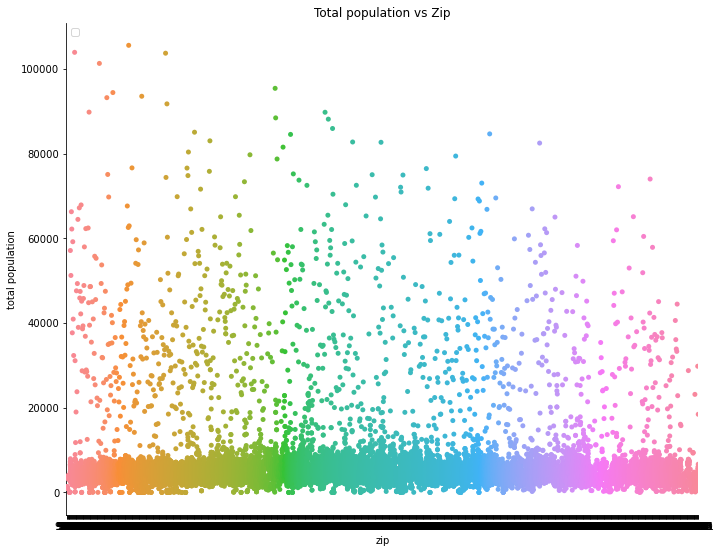

In [71]:
sns.catplot(y ='total population', data = all_enviro, x="zip")
plt.gcf().set_size_inches(12,8)
plt.title('Total population vs Zip')
plt.legend(loc='upper left')
plt.savefig('Total population vs Zip.png')
plt.show()

#### From a simple google search there are 1741 zip codes in california

### Whole point of this project is to analyze the features from this merged CalEnviroScreen dataset that effect adverse health conditions. 
- What are the adverse health effects? 
- My main goal is to find these features and analyze with respect to the other features.


### Lets look at the Health features

Asthma

- Asthma is a disease that affects the lungs and makes it hard to breathe. Symptoms include breathlessness, wheezing, coughing, and chest tightness. The causes of asthma are unknown but both genetic and environmental factors can be involved.
- Five million Californians have been diagnosed with asthma at some point in their lives. People with asthma can be especially susceptible to pneumonia, flu and other illnesses. Outdoor air pollution can trigger asthma attacks.

Low Birth Weight

- Babies who weigh less than about five and a half pounds (or 2500 grams) at birth are considered low birth weight. Poor nutrition, lack of prenatal care, stress and smoking by the mother are known to increase the risk of having a low birth weight baby. Studies suggest that pollution could also be a factor. 
- Low birth-weight babies may face a greater risk of developing asthma or other chronic diseases later in life. They are also more likely to die as infants than babies who are not born low weight.

Cardio Vascular Disease

- Cardiovascular disease refers to conditions that involve blocked or narrowed blood vessels of the heart. A heart attack is the most common result of cardiovascular disease. Many people survive and return to normal life after a heart attack, but quality of life may be reduced. There are many risk factors for developing cardiovascular disease including diet, lack of exercise, smoking and exposure to air pollution.
- Exposure to outdoor air pollution following a heart attack has been shown to increase the risk of death. In addition to people with a past heart attack, the effects of air pollution may also be greater in the elderly and people with other preexisting health conditions.

*** caveat from exploration of the individual Enviroscreens
- Cardiovascular Disease only appears in the 3rd and the 4th enviroscreen, so It cant be used reliably as a target feature for the whole dataset.

In [ ]:
sns.catplot(y ='asthma', data = all_enviro, x="low birth weight")
plt.gcf().set_size_inches(12,8)
plt.title('asthma and low birth weight')
plt.savefig('Total population vs Zip.png')
plt.show()

### All merged data visualizations

- I wanted to look at all the years and the over all trend of health effects in California.
- I chose to 

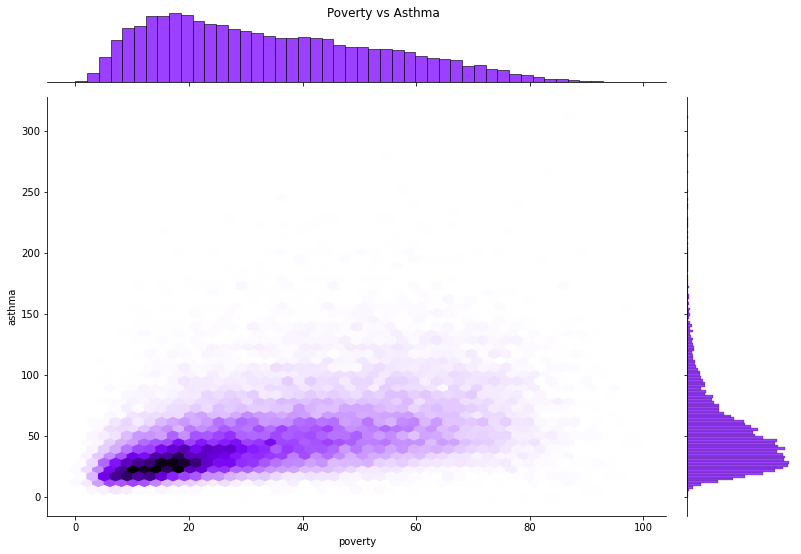

In [40]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="poverty", y="asthma", kind="hex",data=all_enviro)
plt.suptitle('Poverty vs Asthma')
plt.gcf().set_size_inches(12,8)
plt.show()

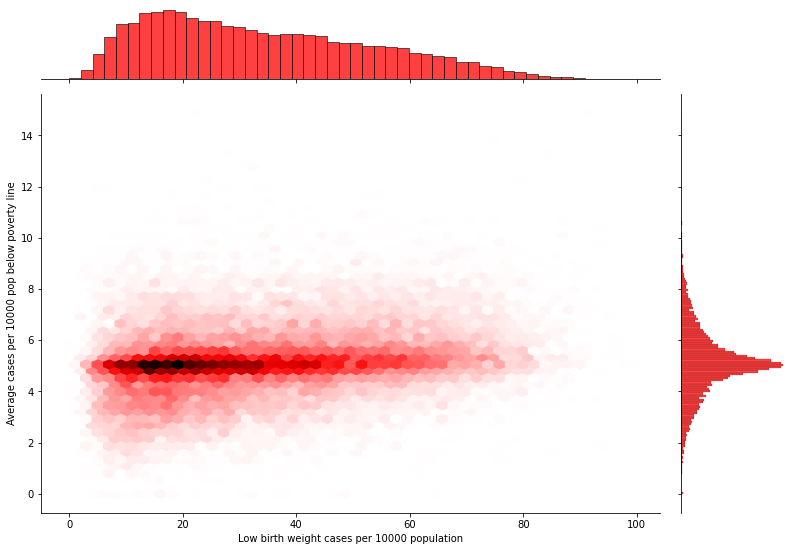

In [42]:
g = sns.jointplot(x="poverty", y="low birth weight", data=all_enviro, kind="hex", color="r")
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="X")
g.set_axis_labels("Low birth weight cases per 10000 population", "Average cases per 10000 pop below poverty line")
plt.gcf().set_size_inches(12,8)
plt.show()

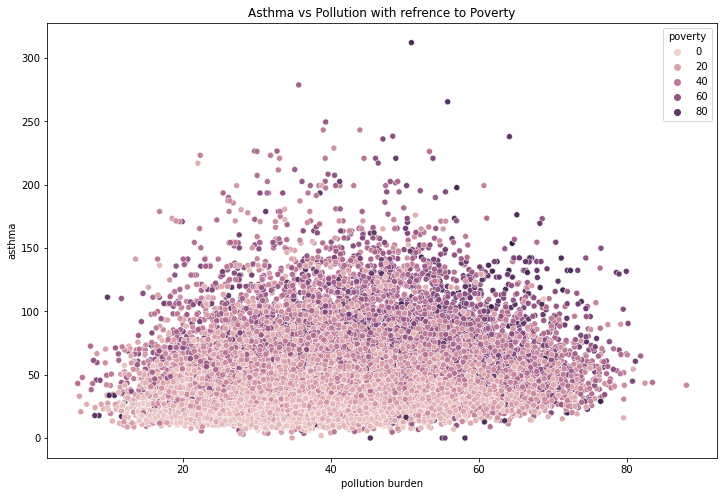

In [46]:
sns.scatterplot(x= 'pollution burden', y ='asthma', data = all_enviro, hue="poverty")
plt.title('Asthma vs Pollution with refrence to Poverty')
plt.gcf().set_size_inches(12,8)
plt.show()

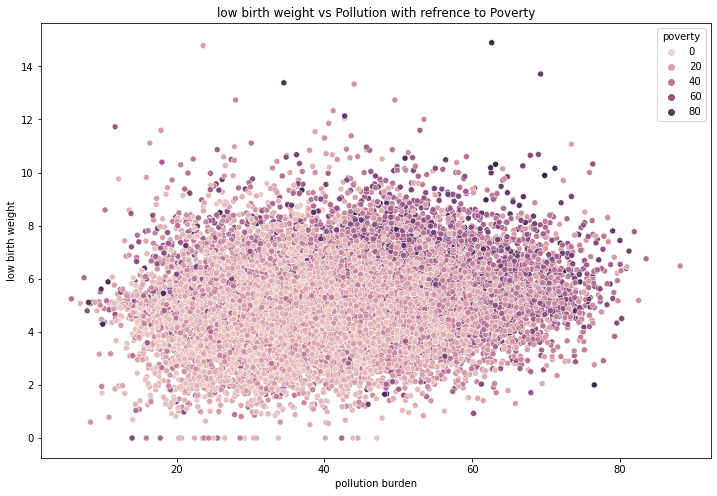

In [48]:
sns.scatterplot(x= 'pollution burden', y ='low birth weight', data = all_enviro, hue="poverty")
plt.title('low birth weight vs Pollution with refrence to Poverty')
plt.gcf().set_size_inches(12,8)
plt.show()

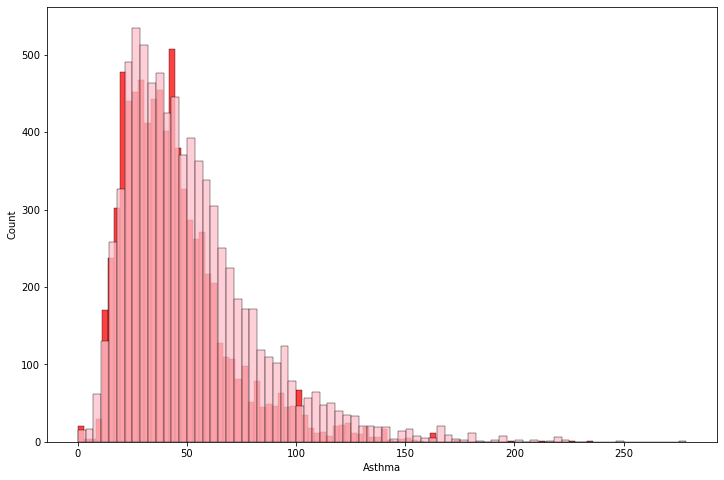

In [70]:
sns.histplot(data = enviro2, x = 'Asthma', color = 'red')
sns.histplot(data = enviro3, x = 'Asthma', 
        color = 'pink')
plt.gcf().set_size_inches(12,8)
plt.show()
        

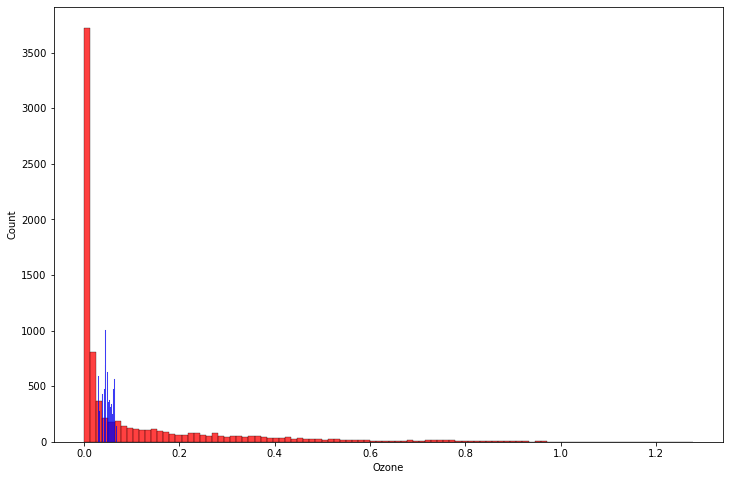

In [68]:
sns.histplot(data = enviro2, x = 'Ozone', color = 'red')
sns.histplot(data = enviro3, x = 'Ozone', 
        color = 'blue')
plt.gcf().set_size_inches(12,8)
plt.show()
        